تشخیص خیار و موز

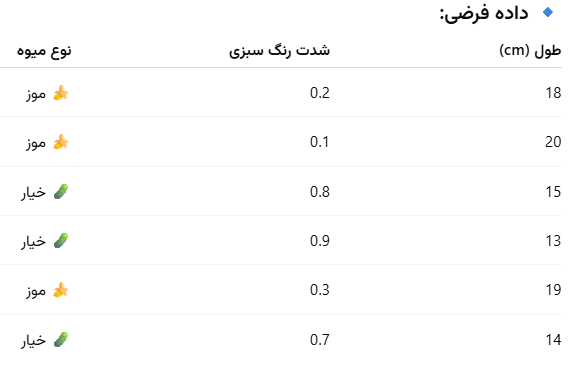

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# داده‌ها
X = np.array([
    [18, 0.2],
    [20, 0.1],
    [15, 0.8],
    [13, 0.9],
    [19, 0.3],
    [14, 0.7]
])
y = [0, 0, 1, 1, 0, 1]  # 0 = 🍌 موز، 1 = 🥒 خیار

# مدل SVM خطی
clf = SVC(kernel='linear')
clf.fit(X, y)

# محدوده رسم
x_min, x_max = 12, 22
y_min, y_max = 0.0, 1.0
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# رسم
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=100)
plt.xlabel("طول میوه (cm)")
plt.ylabel("شدت رنگ سبزی")
plt.title("🍌 vs 🥒 تشخیص موز و خیار با SVM")
plt.show()


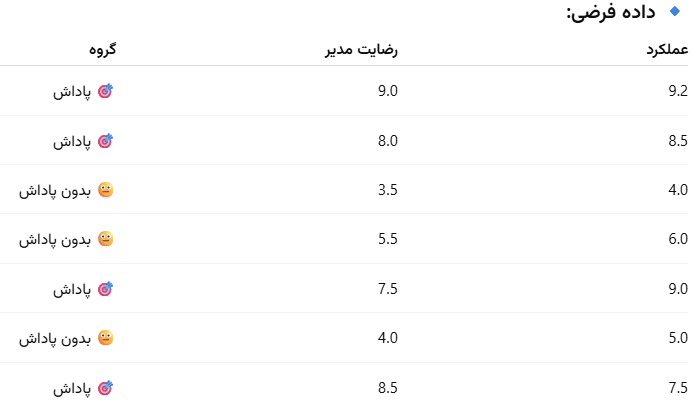

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# داده‌ها
X = np.array([
    [9.2, 9.0],
    [8.5, 8.0],
    [4.0, 3.5],
    [6.0, 5.5],
    [9.0, 7.5],
    [5.0, 4.0],
    [7.5, 8.5]
])
y = [1, 1, 0, 0, 1, 0, 1]  # 1 = 🎯 پاداش, 0 = 😐 بدون پاداش

# مدل SVM با کرنل خطی
clf = SVC(kernel='linear')
clf.fit(X, y)

# محدوده رسم
x_min, x_max = 3, 10
y_min, y_max = 3, 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# رسم نمودار
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=100)
plt.xlabel("عملکرد سالانه (0–10)")
plt.ylabel("رضایت مدیر (0–10)")
plt.title("💼 تصمیم‌گیری برای پاداش کارکنان با SVM")
plt.show()


In [7]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# --- دادهٔ فرضی ---
data = [
    # ethics, work_hours, num_projects, label
    [9.5, 180, 8, 'High'],
    [8.8, 170, 7, 'High'],
    [7.0, 160, 5, 'Medium'],
    [6.5, 150, 4, 'Medium'],
    [5.0, 120, 3, 'Low'],
    [4.5, 110, 2, 'Low'],
    [8.0, 140, 6, 'Medium'],
    [9.0, 190, 9, 'High'],
    [3.5, 100, 1, 'Low'],
    [7.8, 155, 6, 'Medium'],
    [6.0, 130, 3, 'Low'],
    [8.2, 165, 7, 'High'],
    [5.5, 125, 2, 'Low'],
    [7.0, 145, 5, 'Medium'],
    [9.2, 175, 8, 'High']
]

df = pd.DataFrame(data, columns=['ethics','work_hours','num_projects','label'])
X = df[['ethics','work_hours','num_projects']].values
y = df['label'].values

# تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# استانداردسازی
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# مدل SVM چندکلاسه (linear یا rbf)
clf = SVC(kernel='rbf', decision_function_shape='ovr', C=1.0, gamma='scale', random_state=42)
clf.fit(X_train_s, y_train)

# پیش‌بینی و گزارش
y_pred = clf.predict(X_test_s)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1 0 0]
 [0 1 0]
 [0 0 2]]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       1.00      1.00      1.00         1
      Medium       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

